**Import Library**

In [1]:
from libraries import*
from spin1_simulation_NMR import data_file, wX, Ispin, w0, delta_ppm, eta, CQ_M, Qeta, QXG
from functions import fourier3, fourier5


Welcome to JupyROOT 6.26/06
iminuit version: 2.17.0


**Fit Sum Frequency**

┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -5.01e-10   -0.0137  2.13e-12 │
│ b │   -0.0137         1 -5.72e-09   -0.0194  2.53e-11 │
│ c │ -5.01e-10 -5.72e-09         1  1.55e-10  3.31e-08 │
│ d │   -0.0137   -0.0194  1.55e-10         1  -1.6e-10 │
│ e │  2.13e-12  2.53e-11  3.31e-08  -1.6e-10         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.099e-17 (chi2/ndof = 0.0)│              Nfcn = 163              │
│ EDM = 1.83e-21 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minim

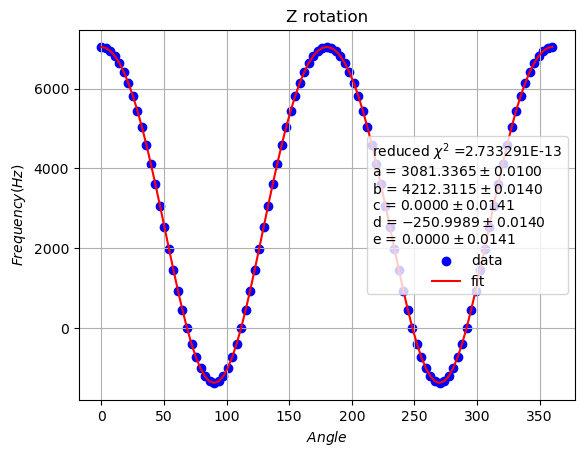

a = 3081.3364977858714
b = 4212.311490495384
c = 8.036357973032138e-12
d = -250.99891768072925
e = -1.5760166238748014e-12
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  1.47e-10   -0.0137  4.09e-12 │
│ b │   -0.0137         1 -6.96e-09   -0.0194 -2.21e-10 │
│ c │  1.47e-10 -6.96e-09         1 -3.58e-09 -4.07e-09 │
│ d │   -0.0137   -0.0194 -3.58e-09         1 -6.58e-11 │
│ e │  4.09e-12 -2.21e-10 -4.07e-09 -6.58e-11         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.149e-16 (chi2/ndof = 0.0)│              Nfcn = 149              │
│ EDM = 3.97e-21 (Goal: 0.0002)    │               

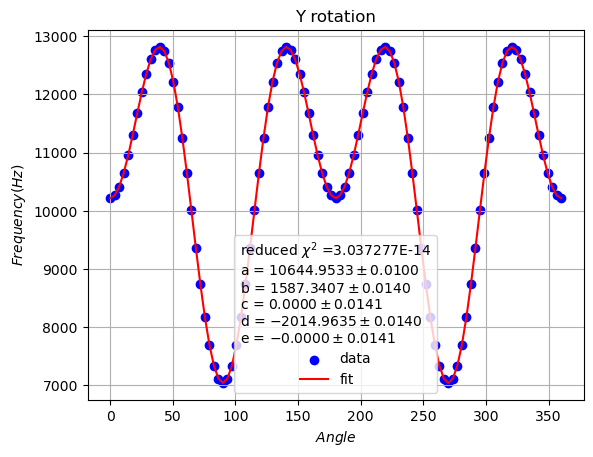

a = 10644.95329247821
b = 1587.3406882740453
c = -7.260287426042499e-12
d = -2014.9635336036697
e = -7.47158270853919e-12
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  1.68e-08   -0.0137 -2.69e-11 │
│ b │   -0.0137         1  6.75e-09   -0.0194 -4.37e-11 │
│ c │  1.68e-08  6.75e-09         1 -2.03e-08  8.53e-09 │
│ d │   -0.0137   -0.0194 -2.03e-08         1  9.41e-11 │
│ e │ -2.69e-11 -4.37e-11  8.53e-09  9.41e-11         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.483e-17 (chi2/ndof = 0.0)│              Nfcn = 143              │
│ EDM = 1.2e-21 (Goal: 0.0002)     │                

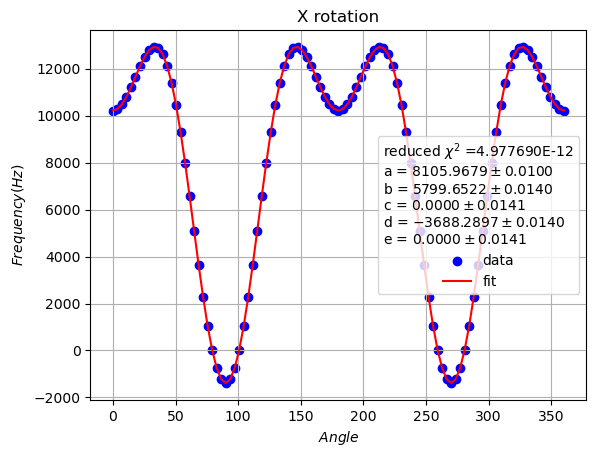

a = 8105.9679198543645
b = 5799.652178769444
c = -3.09712640791733e-12
d = -3688.289651475216
e = -7.859609396454736e-12


In [2]:
df = data_file()

m_s = [0]*3
corr_mat = [0]*3
titles = ['Z rotation', 'Y rotation', 'X rotation']


for i in range(3):
    least_squares = LeastSquares(df[i].angle, df[i].freq_sum, 0.1,fourier5)
    
    m_s[i] = Minuit(least_squares, a = 1, b = 1, c= 1, d = 0, e = 1).migrad()
    # m[i] = m[i].scan(ncall = 50)

    # m[i].migrad()  # finds minimum of least_squares function
    m_s[i].hesse()   # accurately computes uncertainties
    
    fit_info = [
        f"reduced $\\chi^2$ ={(m_s[i].fval / (len(df[i].angle) - m_s[i].nfit)):5E}"
    ]
    # print(fit_info)
    
    for p, v, e in zip(m_s[i].parameters, m_s[i].values, m_s[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_s[i].covariance.correlation())
    print(corr_mat)
    print(m_s[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, df[i].freq_sum, label="data", color = 'blue')
    plt.plot(df[i].angle, fourier5(df[i].angle, *m_s[i].values), label="fit", color = 'red')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    # plt.plot(df[i].freq_sum, fourier5(df[i].angle, *m_s[i].values))
    # plt.show()
    for key, value in zip(m_s[i].parameters, m_s[i].values):
        print(f"{key} = {value}")

**Fit difference frequency**

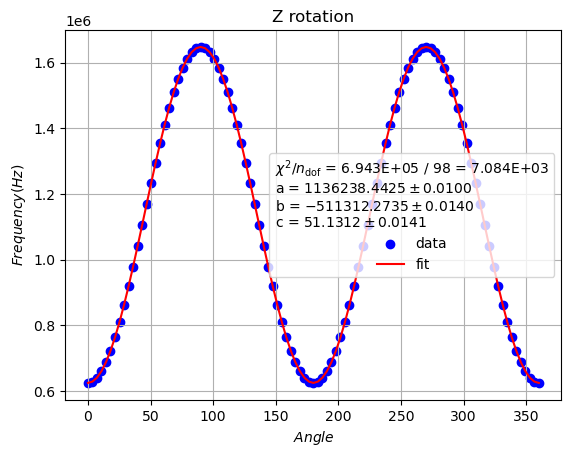

a = 1136238.442491101
b = -511312.2734523064
c = 51.131249709737006


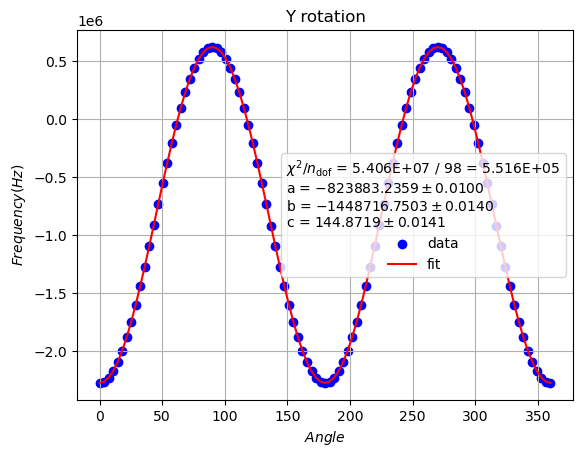

a = -823883.2359279239
b = -1448716.750298868
c = 144.87187502170028


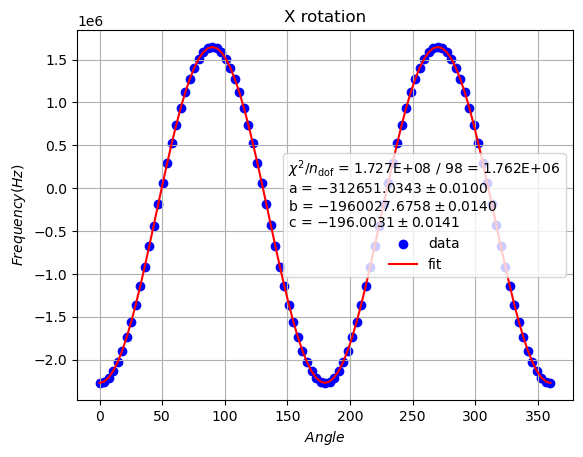

a = -312651.0343329932
b = -1960027.6758009845
c = -196.00314589551527


In [3]:
m_d = [0]*3

for i in range(3):
    least_squares = LeastSquares(df[i].angle, df[i].freq_diff, 0.1,fourier3)
    
    m_d[i] = Minuit(least_squares, a = -0, b = -0, c= 0)
    # m_d[i].fixed["c"] = True
    # m_d[i].fixed["b"] = True
    # m[i] = m[i].scan(ncall = 50)

    m_d[i].migrad()  # finds minimum of least_squares function
    m_d[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_d[i].fval:.3E} / {m_d[i].ndof:.0f} = {m_d[i].fmin.reduced_chi2:.3E}",
    ]
    # print(fit_info)
    

    for p, v, e in zip(m_d[i].parameters, m_d[i].values, m_d[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_d[i].covariance.correlation())
    # print(corr_mat)
    # print(m_d[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, df[i].freq_diff, label="data", color = 'blue')
    plt.plot(df[i].angle, fourier3(df[i].angle, *m_d[i].values), label="fit", color = 'red')
    # plt.plot(df[i].angle, HQ1[i], label = 'input ')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_d[i].parameters, m_d[i].values):
        print(f"{key} = {value}")

**Finding HQ1**

[416617.4460258631, 1098367.1439622715, -1515066.657484528]


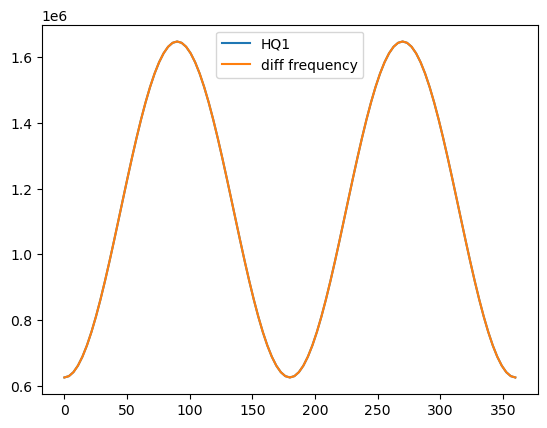

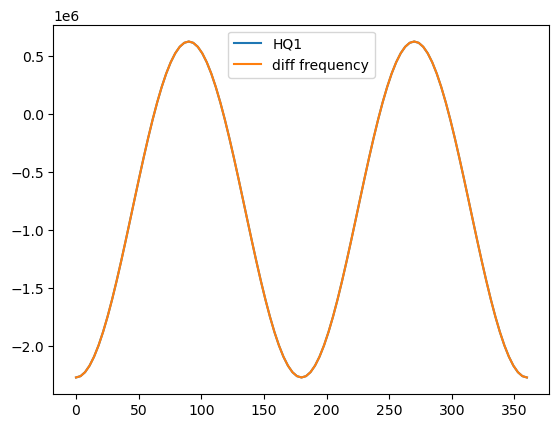

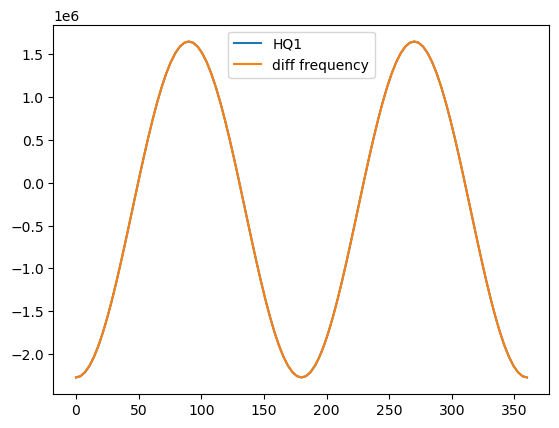

In [4]:

a_s = [0]*3; a_d = [0]*3
b_s = [0]*3; b_d = [0]*3
c_s = [0]*3; c_d = [0]*3
d_s = [0]*3
e_s = [0]*3

par_s = [a_s, b_s, c_s, d_s, e_s]
par_d = [a_d, b_d, c_d]

for i in range(0,3):
    for k in range(len(par_s)):
        par_s[k][i] = m_s[i].values[k]
    for j in range(len(par_d)):
        par_d[j][i] = m_d[i].values[j]

A = [0]*3
B = [0]*3
C = [0]*3
A_HQ1 = [0]*3
B_HQ1 = [0]*3
X = [0]*3


for i in range(0,3):
    A_HQ1[i] = np.array([[3/4, 3/4], [3/4, -3/4]])
    B_HQ1[i] = np.array([a_d[i], b_d[i]])
    X[i] = np.linalg.inv(A_HQ1[i]).dot(B_HQ1[i])
    
gxx_q = X[0][0]
gyy_q= X[0][1]
gxy_q = -c_d[0]*(2/3)

gzz_q = X[1][0]
gxz_q = c_d[1]*(2/3)

gyz_q = -c_d[2]*(2/3)


Q_offdia = [ gxy_q, gxz_q, gyz_q]
Q_dia = [gxx_q, gyy_q, gzz_q]
print(Q_dia)

A = np.array([gzz_q + gyy_q, gzz_q + gxx_q, gxx_q + gyy_q])*3/4
B = np.array([gzz_q - gyy_q, gzz_q - gxx_q, gxx_q - gyy_q ])*3/4
C = np.array([-2*gyz_q, 2*gxz_q, -2*gxy_q])*(-3/2)

HQ1= [0]*3

for i in range(3):
   HQ1[i] = a_d[i] + b_d[i]*np.cos(2*df[i].angle*np.pi/180.) + c_d[i]*np.cos(2*df[i].angle*np.pi/180.) 

   #Plot to check that difference frequency is mostly HQ1
   plt.plot(df[i].angle, HQ1[i], label = 'HQ1')
   plt.plot(df[i].angle, df[i].freq_diff, label = 'diff frequency')
   plt.legend()
   plt.show()

**Calculate Coefficients from Input**

In [5]:
Ax = 3/4*(QXG[2,2] + QXG[1,1])
Bx = 3/4*(QXG[2,2] - QXG[1,1])
Cx = -3/2*QXG[1,2]

Ay = 3/4*(QXG[2,2] + QXG[0,0])
By = 3/4*(QXG[2,2] - QXG[0,0])
Cy = 3/2*QXG[0,2]

Az = 3/4*(QXG[0,0] + QXG[1,1])
Bz = 3/4*(QXG[0,0] - QXG[1,1])
Cz = -3/2*QXG[0,1]



table = [['Ax', a_d[2], Ax],  ['Bx', b_d[2], Bx], ['Cx', c_d[2],Cx], ['Ay', a_d[1], Ay], ['By', b_d[1], By], ['Cy', c_d[1], Cy], ['Az', a_d[0], Az], ['Bz', b_d[0], Bz], ['Cz', c_d[0], Cz]]
print(tabulate(table, headers=['Coefficient','Coefficients from fit', 'Calculated coefficients from Input']))        
# f = Ax + Bx*cos(df[i].angle) + Cx*sin(df[i].angle)
#plt.scatter(df[i].angle, )
#plt.show()

Coefficient      Coefficients from fit    Calculated coefficients from Input
-------------  -----------------------  ------------------------------------
Ax                   -312651                               -312469
Bx                        -1.96003e+06                          -1.96003e+06
Cx                      -196.003                                -0
Ay                   -823883                               -823781
By                        -1.44872e+06                          -1.44872e+06
Cy                       144.872                                 0
Az                         1.13624e+06                           1.13625e+06
Bz                   -511312                               -511312
Cz                        51.1312                               -0


**Verify Tensor Components (from HQ2)**

In [6]:
Dz = 3/32*(gxy_q**2 - 1/4*(gxx_q - gyy_q)**2)/wX
Ez = 3/32*(gxx_q - gyy_q)*gxy_q/wX

Dy = 3/32*(gxz_q**2 - 1/4*(gxx_q - gzz_q)**2)/wX
Ey = 3/32*(gxx_q - gzz_q)*gxz_q/wX

Dx = 3/32*(gyz_q**2 - 1/4*(gzz_q - gyy_q)**2)/wX
Ex = 3/32*(gzz_q - gyy_q)*gyz_q/wX

table = [['Dz', d_s[0], Dz],  ['Ez', e_s[0], Ez], ['Dy', d_s[1], Dy],  ['Ey', e_s[1], Ey], ['Dx', d_s[2], Dx],  ['Ex', e_s[2], Ex]]
print(tabulate(table, headers=['Coefficient','Coefficients from fit', 'Calculated coefficients']))

Coefficient      Coefficients from fit    Calculated coefficients
-------------  -----------------------  -------------------------
Dz                      -250.999                     -250.999
Ez                        -1.57602e-12                  0.0501998
Dy                     -2014.96                     -2015.09
Ey                        -7.47158e-12                  0.403005
Dx                     -3688.29                     -3688.46
Ex                        -7.85961e-12                 -0.737675


**Finding HQ2**

In [7]:
A = [0]*3
B = [0]*3
C = [0]*3
D = [0]*3
E = [0]*3
# x coefficients
A[2] = (9/64*(gzz_q + gyy_q)**2 + 5/128*(gyy_q-gzz_q)**2 + 5/32*gyz_q**2 + 1/4*gxz_q**2 + 1/4*gxy_q**2)/wX
B[2] = (3/32*(gyy_q**2 - gzz_q**2))/wX
C[2] = (3/16*(gzz_q + gyy_q)*gyz_q)/wX
D[2] = 3/32*(gyz_q**2 - 1/4*(gyy_q - gzz_q)**2)/wX
E[2] = 3/32*((gzz_q - gyy_q)*gyz_q)/wX

#y coefficients
A[1] = (9/64*(gzz_q + gxx_q)**2 + 5/128*(gxx_q-gzz_q)**2 + 5/32*gxz_q**2 + 1/4*gyz_q**2 + 1/4*gxy_q**2)/wX
B[1] = 3/32*(gxx_q**2 - gzz_q**2)/wX
C[1] = (-3/16*(gzz_q + gxx_q)*gxz_q)/wX
D[1] = 3/32*(gxz_q**2 - 1/4*(gxx_q - gzz_q)**2)/wX
E[1] = 3/32*((gxx_q - gzz_q)*gxz_q)/wX

#z coefficients
A[0] = (9/64*(gyy_q + gxx_q)**2 + 5/128*(gxx_q-gyy_q)**2 + 5/32*gxy_q**2 + 1/4*gxz_q**2 + 1/4*gyz_q**2)/wX
B[0] = 3/32*(gyy_q**2 - gxx_q**2)/wX
C[0] = (3/16*(gyy_q + gxx_q)*gxy_q)/wX
D[0] = 3/32*(gxy_q**2 - 1/4*(gyy_q - gxx_q)**2)/wX   
E[0] = 3/32*((gxx_q - gyy_q)*gxy_q)/wX

HQ2 = [0]*3
for i in range(0,3):
    HQ2[i] = A[i] + B[i]*np.cos(2*df[i].angle*np.pi/180.) + C[i]*np.sin(2*df[i].angle*np.pi/180.) + D[i]*np.cos(4*df[i].angle*np.pi/180.) + E[i]*np.sin(4*df[i].angle*np.pi/180.)


**Find HCSA1**

In [8]:
A_csa = [0]*3
B_csa = [0]*3
C_csa = [0]*3

for i in range(0,3):
    # A[i]=A[i]
    # B[i]=B[i]
    # C[i]=C[i]
    A_csa[i] = a_s[i] - A[i]
    B_csa[i] = b_s[i] - B[i]
    C_csa[i] = c_s[i] - C[i]

┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  1.01e-12   -0.0137  1.07e-12 │
│ b │   -0.0137         1  -3.6e-11   -0.0194 -8.09e-11 │
│ c │  1.01e-12  -3.6e-11         1  3.53e-12  3.89e-09 │
│ d │   -0.0137   -0.0194  3.53e-12         1  2.99e-12 │
│ e │  1.07e-12 -8.09e-11  3.89e-09  2.99e-12         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.074e-15 (chi2/ndof = 0.0)│              Nfcn = 165              │
│ EDM = 2.02e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minim

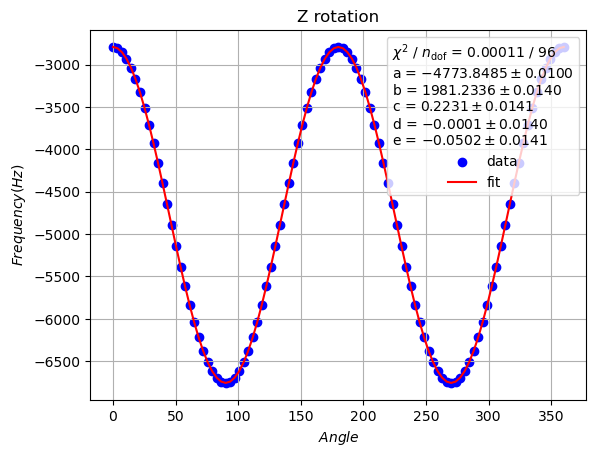

a = -4773.848493487309
b = 1981.233682453799
c = 0.2231078783981888
d = -0.0002249312045386512
e = -0.05019976101057878
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -2.46e-11   -0.0137 -5.31e-11 │
│ b │   -0.0137         1 -8.44e-13   -0.0194  1.89e-11 │
│ c │ -2.46e-11 -8.44e-13         1  3.59e-13  1.07e-07 │
│ d │   -0.0137   -0.0194  3.59e-13         1  3.25e-13 │
│ e │ -5.31e-11  1.89e-11  1.07e-07  3.25e-13         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.159e-16 (chi2/ndof = 0.0)│              Nfcn = 167              │
│ EDM = 1.13e-18 (Goal: 0.0002)    │                  

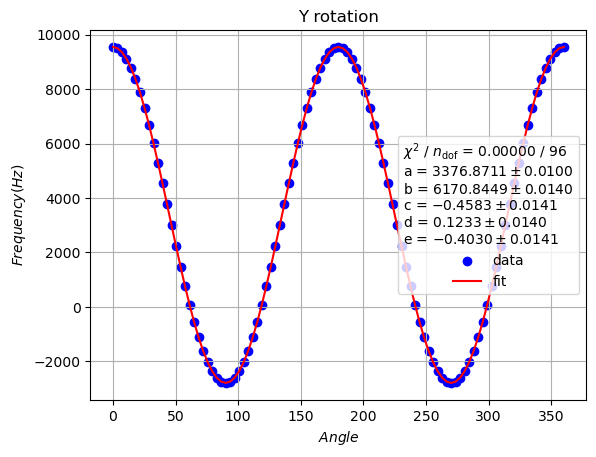

a = 3376.8710971173805
b = 6170.844893965778
c = -0.45833639655114883
d = 0.12328871218876145
e = -0.4030050374860012
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  3.84e-11   -0.0137  3.43e-10 │
│ b │   -0.0137         1 -7.97e-13   -0.0194 -7.03e-11 │
│ c │  3.84e-11 -7.97e-13         1  -4.3e-13 -8.66e-09 │
│ d │   -0.0137   -0.0194  -4.3e-13         1 -3.82e-10 │
│ e │  3.43e-10 -7.03e-11 -8.66e-09 -3.82e-10         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.556e-17 (chi2/ndof = 0.0)│              Nfcn = 167              │
│ EDM = 5.39e-19 (Goal: 0.0002)    │                    

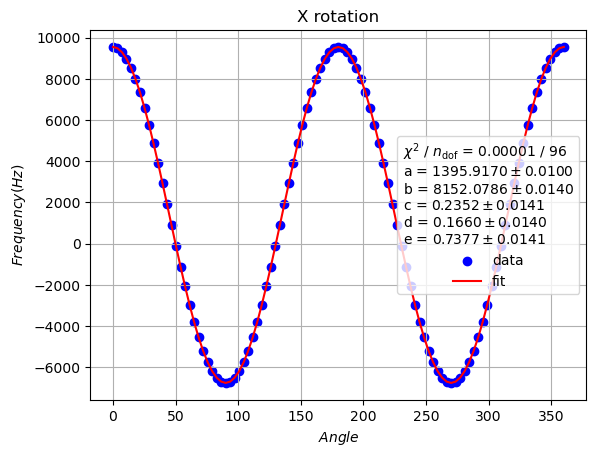

a = 1395.9170536135714
b = 8152.078576419577
c = 0.2352373719543451
d = 0.16593945618966208
e = 0.7376746063764114


In [9]:
m_csa = [0]*3
y_csa = [0]*3
# y_csa[0] = np.subtract(f_s[0], HQ2[0]) 
# print(f_s[0], HQ2[0], y_csa[0])
# 
for i in range(0,3):
    y_csa[i] = np.subtract(df[i].freq_sum, HQ2[i])    
    least_squares = LeastSquares(df[i].angle, y_csa[i], 0.1,fourier5)
    
    m_csa[i] = Minuit(least_squares, a = -1, b = -1, c= -1, d =1, e = 1)
    # m[i] = m[i].scan(ncall = 50)

    m_csa[i].migrad()  # finds minimum of least_squares function
    m_csa[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_csa[i].fval:.5f} / {len(df[i].angle) - m_csa[i].nfit}",
    ]
    # print(fit_info)
    

    for p, v, e in zip(m_csa[i].parameters, m_csa[i].values, m_csa[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_csa[i].covariance.correlation())
    print(corr_mat)
    print(m_csa[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, y_csa[i], label="data", color = 'blue')
    plt.plot(df[i].angle, fourier5(df[i].angle, *m_csa[i].values), label="fit", color = 'red')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_csa[i].parameters, m_csa[i].values):
        print(f"{key} = {value}")

a_csa = [0]*3; 
b_csa = [0]*3; 
c_csa = [0]*3; 
d_csa = [0]*3
e_csa = [0]*3
par_csa = [a_csa, b_csa, c_csa, d_csa, e_csa]

for i in range(0,3):
    for k in range(len(par_csa)):
        par_csa[k][i] = m_csa[i].values[k]


In [10]:
A_HCSA1 = [0]*3
B_HCSA1 = [0]*3
X = [0]*3


for i in range(0,3):
    # A[i] = fit_result_csa[i].params['a0']
    # B[i] = fit_result_csa[i].params['a1']
    # C[i]= fit_result_csa[i].params['b1']

    A_HCSA1[i] = np.array([[1, 1], [1, -1]])
    B_HCSA1[i] = np.array([a_csa[i], b_csa[i]])
    X[i] = np.linalg.inv(A_HCSA1[i]).dot(B_HCSA1[i])
    

gxx_csa = X[0][0]
gyy_csa= X[0][1]
gxy_csa = -c_csa[0]/(2)

gzz_csa = X[1][0]
gxz_csa = c_csa[1]/(2)

gyz_csa = -c_csa[2]/(2)


print(tabulate([['gxx_q',gxx_q], ['gyy_q',gyy_q], ['gzz_q',gzz_q], ['gxy_q',gxy_q], ['gyz_q',gyz_q], ['gxz_q',gxz_q],['gxx_csa',gxx_csa], ['gyy_csa',gyy_csa], ['gzz_csa',gzz_csa], ['gxy_csa',gxy_csa], ['gyz_csa',gyz_csa], ['gxz_csa',gxz_csa]]))

-------  ----------------
gxx_q    416617
gyy_q         1.09837e+06
gzz_q        -1.51507e+06
gxy_q       -34.0875
gyz_q       130.669
gxz_q        96.5813
gxx_csa   -1396.31
gyy_csa   -3377.54
gzz_csa    4773.86
gxy_csa      -0.111554
gyz_csa      -0.117619
gxz_csa      -0.229168
-------  ----------------


**Checking Input**

In [11]:
#****** Input Vaue****************
#coupling values for NAV (taken from paper https://pubmed.ncbi.nlm.nih.gov/22027340/)


#for CSA
delta_fit = gzz_csa/w0
eta_fit = (gxx_csa- gyy_csa)/gzz_csa

#for Quadrupolar
CQ_fit = gzz_q*(2*Ispin*(2*Ispin - 1))/10**6
Qeta_fit = (gxx_q - gyy_q)/gzz_q

table = [['delta', delta_fit, delta_ppm, abs(delta_fit - delta_ppm)*100/delta_ppm],  ['eta', eta_fit, eta, abs(eta_fit - eta)*100/eta], ['CQ', CQ_fit, CQ_M, abs((CQ_fit - CQ_M)/CQ_M)*100], ['Qeta', Qeta_fit ,Qeta, abs(Qeta_fit - Qeta)*100/Qeta]]
print(tabulate(table, headers=['Qauntity', 'Fit Value','Input Value', '% difference']))

Qauntity      Fit Value    Input Value    % difference
----------  -----------  -------------  --------------
delta        109.997           110          0.00297454
eta            0.415017          0.415      0.00417002
CQ            -3.03013          -3.03       0.00439983
Qeta           0.44998           0.45       0.00444395


**Finding HQ_CSA**

In [14]:
A = [0]*3
B = [0]*3
C = [0]*3
D = [0]*3
E = [0]*3

A[2] = 3/2*(gxz_q*gxz_csa + gxy_q*gxy_csa - gyz_q*gyz_csa - 1/4*(gyy_q-gzz_q)*(gyy_csa-gzz_csa))/wX
B[2] = 3/2*(gxz_q*gxz_csa - gxy_q*gxy_csa)/wX
C[2] = -3/2*(gxy_q*gxz_csa + gxz_q*gxy_csa)/wX
D[2] = 3/2*(1/4*(gyy_q - gzz_q)*(gyy_csa - gzz_csa) - gyz_q*gyz_csa)/wX
E[2] = 3/4*((gyy_q - gzz_q)*gyz_csa - gyz_q*(gyy_csa - gzz_csa))/wX

A[1] = 3/2*(gxz_q*gxz_csa + gxy_q*gxy_csa + gyz_q*gyz_csa + 1/4*(gzz_q - gxx_q)*(gzz_csa - gxx_csa))/wX
B[1] = 3/2*(gyz_q*gyz_csa - gxy_q*gxy_csa)/wX
C[1] = 3/2*(gxy_q*gyz_csa + gyz_q*gxy_csa)/wX
D[1] = 3/2*(gxz_q*gxz_csa - 1/4*(gzz_q - gxx_q)*(gzz_csa - gxx_csa))/wX 
E[1] = 3/4*((gxx_q - gzz_q)*gxz_csa + gxz_q*(gxx_csa - gzz_csa))/wX

A[0] = 3/2*(gxz_q*gxz_csa + gxy_q*gxy_csa + gyz_q*gyz_csa + 1/4*(gxx_q - gyy_q)*(gxx_csa - gyy_csa))/wX
B[0] = 3/2*(gxz_q*gxz_csa - gyz_q*gyz_csa)/wX
C[0] = -3/2*(gyz_q*gxz_csa + gxz_q*gyz_csa)/wX
D[0] = 3/2*(gxy_q*gxy_csa - 1/4*(gxx_q - gyy_q)*(gxx_csa - gyy_csa))/wX
E[0] = 3/4*((gxx_q - gyy_q)*gxy_csa + gxy_q*(gxx_csa - gyy_csa))/wX

HQCSA = [0]*3
for i in range(0,3):
    HQCSA[i] = A[i] + B[i]*np.cos(2*df[i].angle*np.pi/180.) + C[i]*np.sin(2*df[i].angle*np.pi/180.) + D[i]*np.cos(4*df[i].angle*np.pi/180.) + E[i]*np.sin(4*df[i].angle*np.pi/180.)


**Fitting HQ_ACS**

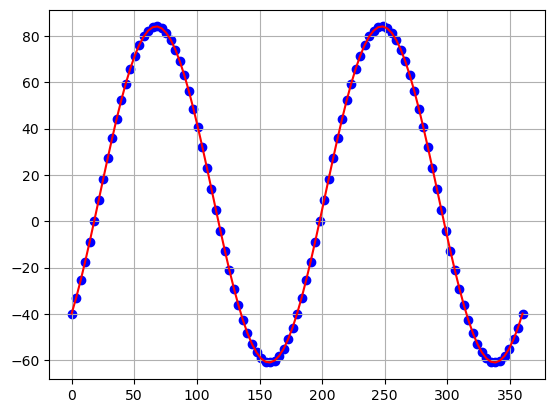

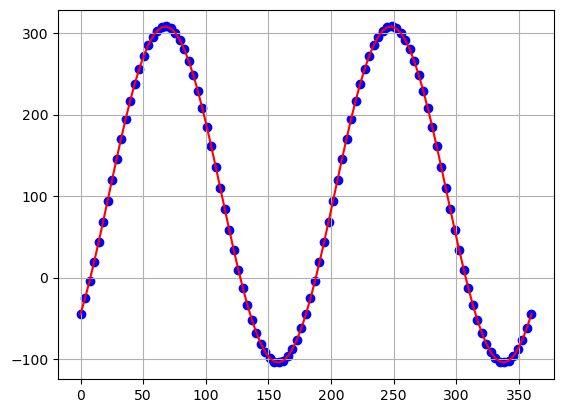

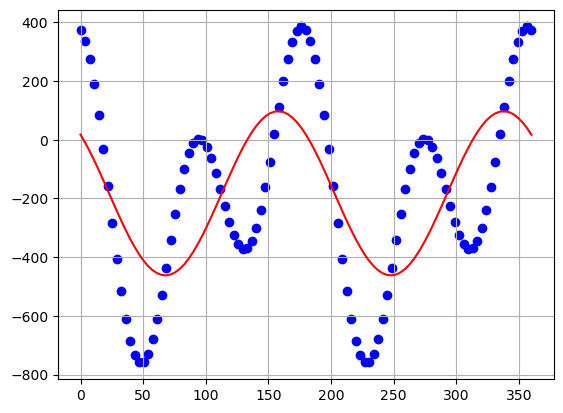

In [13]:

f_acs = [0]*3
m_acs = [0]*3



for i in range(0,3):
    f_acs[i] = np.subtract(df[i].freq_diff, np.add(HQ1[i], HQCSA[i])) 
    # print(HQCSA[i])

    least_squares = LeastSquares(df[i].angle, f_acs[i], 0.1,fourier3)
    
    m_acs[i] = Minuit(least_squares, a = 1000, b = 100, c= 100)
    # m_acs[i].fixed["c"] = True
    # # m_d[i].fixed["b"] = True
    # # m[i] = m[i].scan(ncall = 50)

    m_acs[i].migrad()  # finds minimum of least_squares function
    m_acs[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_acs[i].fval:.3E} / {m_acs[i].ndof:.0f} = {m_acs[i].fmin.reduced_chi2:.3E}",
    ]
    
    

    for p, v, e in zip(m_d[i].parameters, m_acs[i].values, m_acs[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    # corr_mat = (m_acs[i].covariance.correlation())
    # # print(corr_mat)
    # # print(m_d[i].migrad())
    # # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, f_acs[i], label="data", color = 'blue')
    plt.plot(df[i].angle, fourier3(df[i].angle, *m_acs[i].values), label="fit", color = 'red')
    # plt.plot(xdata, HQ1[i], label = 'input ')
    # plt.xlabel(r'$Angle$')
    # plt.ylabel(r'$Frequency (Hz)$')
    # # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    # plt.title(titles[i])
    # plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()